In [1]:
import os
import yaml
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

os.chdir("../scripts")

import preprocess, train, inference, interpret

In [2]:
with open("../model/params.yaml", "r") as params_file:
    params = yaml.safe_load(params_file)

data_dir = params['data_dir']

In [7]:
file_name = "Trepn_2022.04.04_183605_bright_3_ram_33_cpu44_ap10m.csv"
data = preprocess.load_data(file_name)
data.head(3)

,Time,Min,Memory Usage,CPU Frequency,CPU Load,Wi-Fi State,Wi-Fi RSSI Level,Screen Bright,Battery,GPS State,Quality,Download,Upload
0,27,00:00:00,1824244,1144000,44,3,-61,3,79,1,360,456,17
1,10002,00:00:10,1812244,1586000,44,3,-67,3,79,1,360,456,17
2,20043,00:00:20,1828204,1586000,44,3,-63,3,79,1,360,456,17


In [8]:
train_df, test_df = preprocess.prep_data(df=data, train_frac=0.6, plot_df=True)

Starting with data preparation...
Completed.


In [9]:
print(train_df.shape)
print(test_df.shape)
train_df.head(10)

(47, 10)
(32, 10)


,Time,CPU Frequency,CPU Load,Memory Usage,Wi-Fi RSSI Level,Quality,Screen Bright,Battery,Download,Upload
Time,,,,,,,,,,
27,0.000000,0.4083,0.0,0.748012,0.833333,0.0,0.0,1.0,0.0,0.0
10002,0.021684,1.0000,0.0,0.592111,0.333333,0.0,0.0,1.0,0.0,0.0
20043,0.043511,1.0000,0.0,0.799460,0.666667,0.0,0.0,1.0,0.0,0.0
30031,0.065223,1.0000,0.0,0.365536,0.666667,0.0,0.0,1.0,0.0,0.0
40012,0.086920,1.0000,0.0,0.648288,0.500000,0.0,0.0,1.0,0.0,0.0
50001,0.108634,1.0000,0.0,0.193941,0.916667,0.0,0.0,1.0,0.0,0.0
60043,0.130463,0.4083,0.0,0.743075,0.916667,0.0,0.0,1.0,0.0,0.0
70033,0.152179,1.0000,0.0,0.520813,0.916667,0.0,0.0,1.0,0.0,0.0
80029,0.173909,0.0000,0.0,0.717196,0.500000,0.0,0.0,1.0,0.0,0.0


In [10]:
plot_df = pd.read_csv(Path(data_dir, 'plot_df.csv'))
plot_df['Battery'] = plot_df.Battery
plot_df = plot_df.dropna()

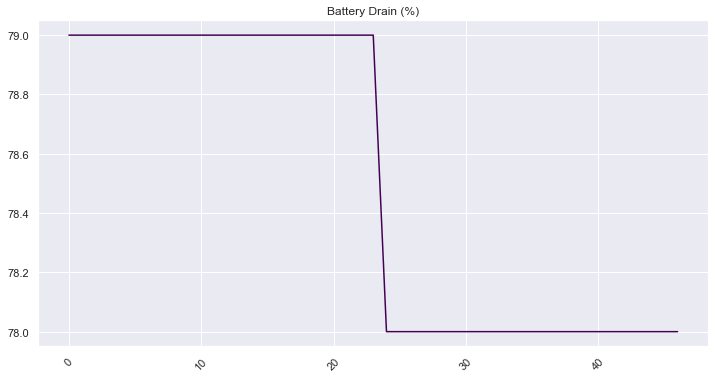

In [11]:
plot_df['Battery'].plot(figsize=(12,6), rot=45, cmap='viridis')
plt.title('Battery Drain (%)')
plt.show()